In [1]:
 !pip install transformers -qq
 !pip install emoji -qq

In [2]:
import os
import time
import pandas as pd
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt

from utils import Preprocess
from model import VisionBertClassifier
from tensorflow.keras.applications import VGG19

%matplotlib inline
plt.style.use('dark_background')

In [3]:
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d parthplc/facebook-hateful-meme-dataset

!unzip -qq '/content/facebook-hateful-meme-dataset.zip'

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
facebook-hateful-meme-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace data/LICENSE.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
data_dir = "/content/data/"

train_samples_frame = pd.read_json('/content/data/train.jsonl', lines=True)
train_samples_frame.head()
train_samples_frame = train_samples_frame.sample(frac=1).reset_index()

train_samples_frame.label.value_counts()

0    5450
1    3050
Name: label, dtype: int64

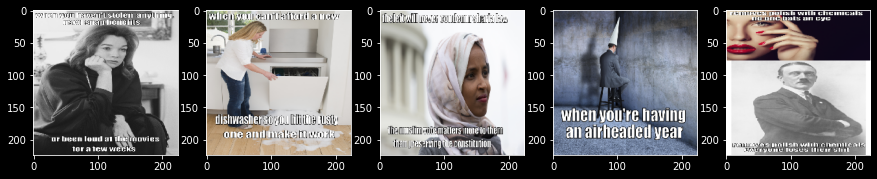

In [4]:
images = []
for i in range(5):
  image = tf.io.read_file(filename=data_dir + train_samples_frame.loc[i, "img"])
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [224,224], method='nearest')
  images.append(image)

f, axarr = plt.subplots(1,5, figsize = (15,10))
axarr[0].imshow(images[0])
axarr[1].imshow(images[1])
axarr[2].imshow(images[2])
axarr[3].imshow(images[3])
axarr[4].imshow(images[4])

In [5]:
vision_model = VGG19(weights="imagenet", include_top=False, pooling='avg')
preprocess = Preprocess(train_samples_frame, data_dir, image_embeddings=True, vision_model=vision_model)
preprocess.preprocess()
cls = VisionBertClassifier(image_embeddings=True)
history = cls.train(preprocess.data, vision_model=vision_model)

8500it [07:57, 17.78it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
  0%|          | 0/8500 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1944: FutureWarnin

Epoch 1/100
213/213 [==============================] - 28s 132ms/step - loss: 1.1394 - accuracy: 0.5459 - auc: 0.5076 - true_positives: 866.0000 - true_negatives: 2846.0000 - false_positives: 1505.0000 - false_negatives: 1583.0000 - val_loss: 0.8779 - val_accuracy: 0.5965 - val_auc: 0.5360 - val_true_positives: 150.0000 - val_true_negatives: 864.0000 - val_false_positives: 235.0000 - val_false_negatives: 451.0000
Epoch 2/100
213/213 [==============================] - 25s 117ms/step - loss: 0.9486 - accuracy: 0.5757 - auc: 0.5336 - true_positives: 837.0000 - true_negatives: 3078.0000 - false_positives: 1273.0000 - false_negatives: 1612.0000 - val_loss: 0.7942 - val_accuracy: 0.5818 - val_auc: 0.5491 - val_true_positives: 156.0000 - val_true_negatives: 833.0000 - val_false_positives: 266.0000 - val_false_negatives: 445.0000
Epoch 3/100
213/213 [==============================] - 26s 120ms/step - loss: 0.8615 - accuracy: 0.5781 - auc: 0.5490 - true_positives: 812.0000 - true_negatives: 311

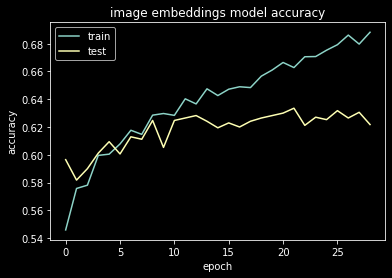

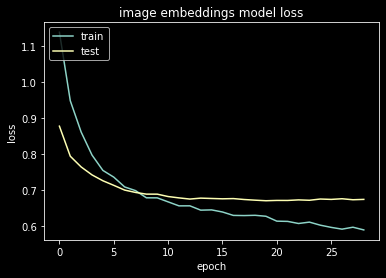

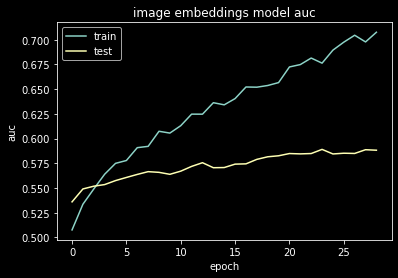

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('image embeddings model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('image embeddings model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for auc
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('image embeddings model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
vision_model = VGG19(weights="imagenet", include_top=False, pooling='avg')
preprocess = Preprocess(train_samples_frame, data_dir, image_embeddings=False, vision_model=vision_model)
preprocess.preprocess()
cls = VisionBertClassifier(image_embeddings=False)
history = cls.train(preprocess.data, vision_model=vision_model)

8500it [02:10, 65.19it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
  0%|          | 0/8500 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1944: FutureWarnin

Epoch 1/100
213/213 [==============================] - 41s 193ms/step - loss: 0.6793 - accuracy: 0.6068 - auc: 0.5432 - true_positives: 448.0000 - true_negatives: 3678.0000 - false_positives: 698.0000 - false_negatives: 1976.0000 - val_loss: 0.6533 - val_accuracy: 0.6365 - val_auc: 0.5837 - val_true_positives: 45.0000 - val_true_negatives: 1037.0000 - val_false_positives: 37.0000 - val_false_negatives: 581.0000
Epoch 2/100
213/213 [==============================] - 37s 172ms/step - loss: 0.6375 - accuracy: 0.6437 - auc: 0.6127 - true_positives: 521.0000 - true_negatives: 3856.0000 - false_positives: 520.0000 - false_negatives: 1903.0000 - val_loss: 0.6525 - val_accuracy: 0.6353 - val_auc: 0.6032 - val_true_positives: 35.0000 - val_true_negatives: 1045.0000 - val_false_positives: 29.0000 - val_false_negatives: 591.0000
Epoch 3/100
213/213 [==============================] - 37s 172ms/step - loss: 0.6236 - accuracy: 0.6578 - auc: 0.6415 - true_positives: 487.0000 - true_negatives: 3986.00

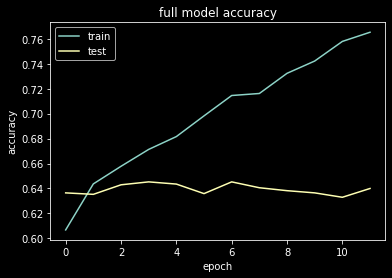

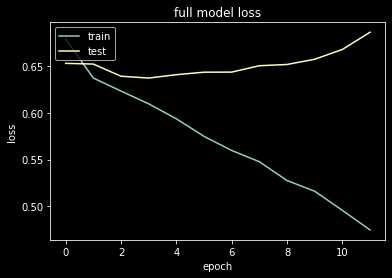

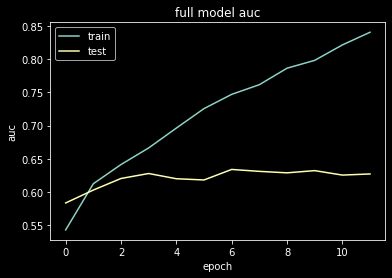

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('full model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('full model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for auc
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('full model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()